# ARCO-ERA5

In their [public dataset program](https://cloud.google.com/storage/docs/public-datasets), Google's Cloud Storage provides a variety of public datasets that can be accessed by the community. Google pays for the hosting of these datasets.

One of these datasets is an "Analysis-Ready, Cloud Optimized" [(ARCO) ERA5 dataset](https://github.com/google-research/arco-era5). This is based on the European Centre for Medium-Range Weather Forecasts (ECMWF) [Atmospheric Reanalysis product](https://www.ecmwf.int/en/forecasts/dataset/ecmwf-reanalysis-v5), a very commonly used dataset for world-wide historical meteorological parameters ranging from 1940 to now.

This dataset uses [Zarr](https://zarr.dev/) to make access very easy.

You might need to install the following dependencies still:

In [ ]:
%pip install xarray matplotlib zarr gcsfs

Now we can open the Zarr store with the following code ([copied from the ARCO-ERA5 github page](https://github.com/google-research/arco-era5)).

In [54]:
import xarray

ds = xarray.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
    chunks=None,
    storage_options=dict(token='anon'),
)
ar_full_37_1h = ds.sel(time=slice(ds.attrs['valid_time_start'], ds.attrs['valid_time_stop']))

The data is opened as an xarray "Dataset". This dataset holds all variables and their associated dimensions and coordinates.
As you can see, there are 273 variables contained in this dataset:

In [55]:
ar_full_37_1h

<xarray.Dataset> Size: 2PB
Dimensions:                                                          (
                                                                      time: 740712,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 3kB ...
  * level                                                            (level) int64 296B ...
  * longitude                                                        (longitude) float32 6kB ...
  * time                                                             (time) datetime64[ns] 6MB ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 3TB ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 3TB ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 3TB ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 3TB ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 3TB ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 3TB ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 3TB ...
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 3TB ...
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 3TB ...
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 3TB ...
    wave_spectral_skewness                                           (time, latitude, longitude) float32 3TB ...
    zero_degree_level                                                (time, latitude, longitude) float32 3TB ...
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2024-09-27 08:06:09.120900
    valid_time_stop:   2024-06-30

With xarray we can quite quickly make a selection of the data (here a certain point in time), and plot it.

Note that only once the actual underlying data is needed for creating output, such as plotting, the data is retrieved from Google's servers:

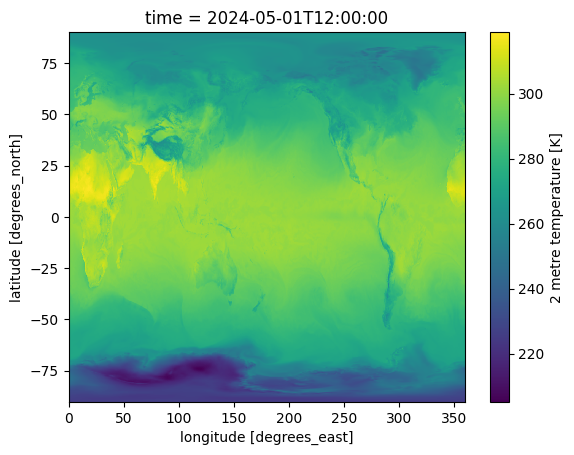

In [6]:
ar_full_37_1h["2m_temperature"].sel(time="2024-05-01T12:00:00").plot()

We can make this plot a bit prettier by making use of [cartopy](https://scitools.org.uk/cartopy):

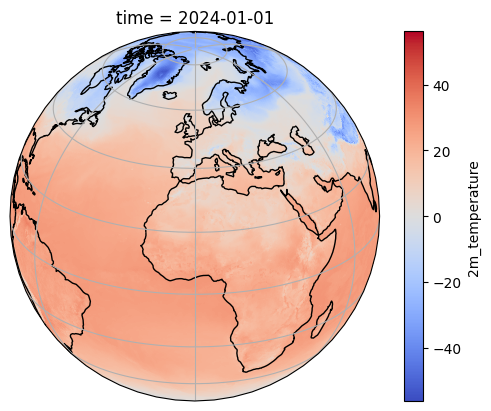

In [53]:
# Uncomment the following line to install cartopy. With cartopy you can make prettier plots
# %pip install cartopy

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.Orthographic(0, 25))
ax.gridlines()
ax.coastlines()

ds_t = ar_full_37_1h["2m_temperature"].sel(time="2024-01-01T00:00:00")

(ds_t - 273.15).plot(
    ax=ax, cmap="coolwarm", transform=ccrs.PlateCarree()
)

We can also add additional information to the plot such as sea-ice cover:

Text(0.5, 1.0, 'Air temperature (colors) and sea ice cover (hatched area)\n')

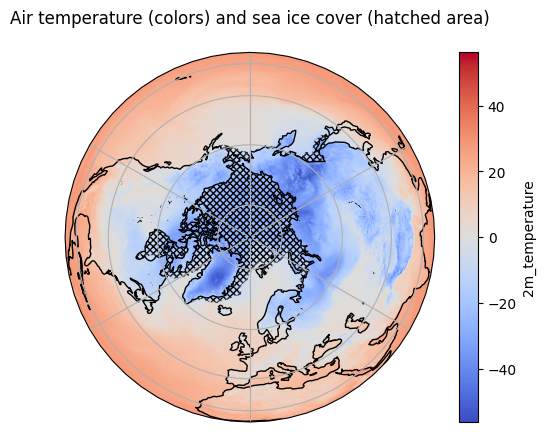

In [52]:
ax = plt.axes(projection=ccrs.Orthographic(0, 90))
ax.gridlines()
ax.coastlines()

ds_ice = ar_full_37_1h["sea_ice_cover"].sel(time="2024-01-01T00:00:00")

(ds_t - 273.15).plot(
    ax=ax, cmap="coolwarm", transform=ccrs.PlateCarree()
)
ds_ice.where(ds_ice>0.2).plot.contourf(
    colors=[(1, 1, 1, 0.0)],  # RGBA color (alpha is 0.0 to make it transparent)
    ax=ax, transform=ccrs.PlateCarree(), hatches=['xxxxx'], add_colorbar=False,
)
plt.title("Air temperature (colors) and sea ice cover (hatched area)\n")